In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# train test split 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
import pickle

from sklearn.metrics import mean_absolute_error

In [17]:
df = pd.read_csv("preprocessed_data.csv", index_col='Unnamed: 0')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,spark,aws,excel,sql,django,hadoop,java,db,tableau,azure
0,Data Scientist,$74K - $139K,Intro (Use Font Arial 12):\nAs a Data Scientis...,4.4,Applied Information Sciences,"Chevy Chase, MD",501 to 1000 Employees,1982,Unknown,IT Services,...,0,0,0,1,0,0,0,1,0,1
1,Web Developer,$41K - $83K,We are the fastest growing employer of emergin...,4.0,Revature,"Tampa, FL",1001 to 5000 Employees,2003,Unknown,IT Services,...,0,0,0,0,0,0,0,0,0,0
2,Data Analyst,$43K - $88K,"HR Data Analyst - Direct Hire - Buffalo, NY\nO...",4.1,Systems Personnel,"Niagara Falls, NY",1 to 50 Employees,1996,Unknown,Staffing & Outsourcing,...,0,0,0,1,0,0,0,0,1,0
3,Database Administrator,$68K - $136K,"Secure our Nation, Ignite your Future\nBecome ...",4.2,ManTech International Corporation,"Fort Meade, MD",5001 to 10000 Employees,1968,Unknown,Research & Development,...,0,0,0,0,0,0,0,1,0,0
4,iOS Developer,$72K - $104K,Are you an iOS developer who loves to create m...,4.1,Garmin,"Olathe, KS",10000+ Employees,1989,Unknown,Consumer Products Manufacturing,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Front End Developer,$58K - $117K,US Citizenship is required\nFront end Develope...,-1.0,EDR Technology,"Ashburn, VA",Unknown,-1,Unknown,-1,...,0,0,0,0,0,0,1,1,0,0
4913,Sr Software Quality Engineer,$78K - $147K,PRA Health Sciences is seeking the best and br...,4.0,PRA Health Sciences,"San Diego, CA",10000+ Employees,1976,Unknown,Biotech & Pharmaceuticals,...,0,0,0,0,0,0,0,0,0,0
4914,Lead Mobile Engineer,$79K - $162K,About Us\nWe are a fintech startup with a miss...,-1.0,Treecard,"Austin, TX",Unknown,-1,Unknown,-1,...,0,0,0,0,0,0,0,0,0,0
4915,Cloud Infrastructure Engineer (SRE/Java),$61K - $132K,"Every day, Global Payments makes it possible f...",3.5,Global Payments,"Columbus, GA",10000+ Employees,1967,Unknown,Financial Transaction Processing,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age',
       'job_title_tag', 'seniority', 'desc_len', 'python', 'R', 'spark', 'aws',
       'excel', 'sql', 'django', 'hadoop', 'java', 'db', 'tableau', 'azure'],
      dtype='object')

In [19]:
df_model = df[['job_title_tag', 'seniority', 'Rating', 'Size',
               'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
               'avg_salary', 'job_state', 'age',
               'desc_len', 'python', 'R', 'spark', 'aws',
               'excel', 'sql', 'django', 'hadoop', 'java', 'db', 'tableau', 'azure']]
               

In [20]:
dummy_df = pd.get_dummies(df_model)

X = dummy_df.drop('avg_salary', axis =1)
y = dummy_df.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

dummy_df

,Rating,hourly,employer_provided,avg_salary,age,desc_len,python,R,spark,aws,...,job_state_SD,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_VT,job_state_WA,job_state_WI,job_state_WV,job_state_WY
0,4.4,0,0,106.5,39,755,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0,0,62.0,18,625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.1,0,0,65.5,25,1366,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.2,0,0,102.0,53,765,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.1,0,0,88.0,32,929,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,-1.0,0,0,87.5,-1,1314,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4913,4.0,0,0,112.5,45,980,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4914,-1.0,0,0,120.5,-1,812,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4915,3.5,0,0,96.5,54,641,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     17.54
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:56:34   Log-Likelihood:                -21527.
No. Observations:                4917   AIC:                         4.363e+04
Df Residuals:                    4629   BIC:                         4.550e+04
Df Model:                         287                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 51.9121      8.516      6.096      0.000      35.216      68.608
Rating                                                 0.7896      0.323      2.446      0.014       0.157       1.423
hourly                                               -47.3043      4.307    -10.982      0.000     -55.749     -38.860
employer_provided                                      8.6496      4.886      1.770      0.077      -0.929      18.228
age                                                   -0.0194      0.011     -1.823      0.068      -0.040       0.001
desc_len                                               0.0012      0.000      2.861      0.004       0.000       0.002
python                                                -0.7730      2.360     -0.328      0.743      -5.399       3.853
R                                                    -19.9576     10.744     -1.858      0.063     -41.021       1.105
spark                                                 -5.1634      4.464     -1.157      0.247     -13.914       3.587
aws                                                   -1.2059      1.640     -0.735      0.462      -4.421       2.009
excel                                                 -0.1822      0.977     -0.187      0.852      -2.097       1.733
sql                                                    1.7702      1.309      1.352      0.176      -0.796       4.336
django                                                 8.6161     10.511      0.820      0.412     -11.989      29.222
hadoop                                                -2.3537      5.992     -0.393      0.694     -14.101       9.394
java                                                   0.4659      1.194      0.390      0.697      -1.876       2.808
db                                                     1.8451      1.097      1.682      0.093      -0.305       3.995
tableau                                               -6.6393      3.728     -1.781      0.075     -13.948       0.669
azure                                                  4.1545      3.015      1.378      0.168      -1.756      10.065
job_title_tag_analyst                                -10.3316      1.554     -6.650      0.000     -13.378      -7.286
job_title_tag_data scientist/engineer                 16.3451      2.006      8.150      0.000      12.413      20.277
job_title_tag_devops                                   6.3655      4.144      1.536      0.125      -1.759      14.490
job_title_tag_mle                                     14.8583      5.662      2.624      0.009       3.759      25.958
job_title_tag_mobile app dev                          17.6555      1.647     10.721      0.000      14.427  

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-15701430.097274236

In [23]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-14.932914020695288

In [24]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3)))

,alpha,error
3,0.04,-14.645882


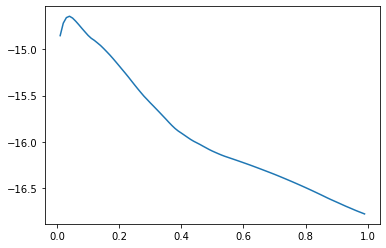

In [25]:
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


In [26]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))

-14.07903218364475

In [27]:
parameters = {'n_estimators':range(10,50,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 50, 10)},
             scoring='neg_mean_absolute_error')

In [31]:
print(gs.best_score_)
print(gs.best_estimator_)


# test ensembles 

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

-14.130521650682942
RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=40)


In [38]:
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))
print(mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2))

35331286.98300084
14.123168644312411
13.105830792682926
13.258542745831512


In [43]:
print(y_test[:5], tpred_rf[:5])


[ 59.5 129.   93.5  77.   96. ] [72.275  63.6375 96.7875 81.4375 95.475 ]


In [34]:
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'Models/reg_model_file' + ".pkl", "wb" ))

In [46]:
file_name = "Models/reg_model_file.pkl"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

l = model.predict(X_test).reshape(1,-1)[0]

list(X_test.iloc[1,:])
l

array([72.275 , 63.6375, 96.7875, ..., 90.425 , 75.375 , 91.925 ])

In [39]:
X_test

,Rating,hourly,employer_provided,age,desc_len,python,R,spark,aws,excel,...,job_state_SD,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_VT,job_state_WA,job_state_WI,job_state_WV,job_state_WY
3823,4.0,0,0,6,732,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2367,-1.0,0,0,-1,435,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,4.3,0,0,215,1092,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,4.0,0,0,21,1083,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4578,3.9,0,0,52,593,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,3.8,0,0,-1,858,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1386,3.0,0,0,117,1083,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3805,4.8,0,0,7,782,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3391,3.9,0,0,-1,449,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
